#### Teoría de Circuitos II

# Tarea Semanal 13

#### Por Nahuel Braian Contreras

### Actividad
Los cáclulos del ejercicios se realizaron en OneNote

In [38]:
from IPython.display import IFrame
IFrame("TS13.pdf", width=900, height=900)

### Comprobacion

Comprobaremos los resultados obtenidos analíticamente a traves de simulación por python.

### Ejercicio 1

Verificaremos si los valores y componentes obtenidos son correctos

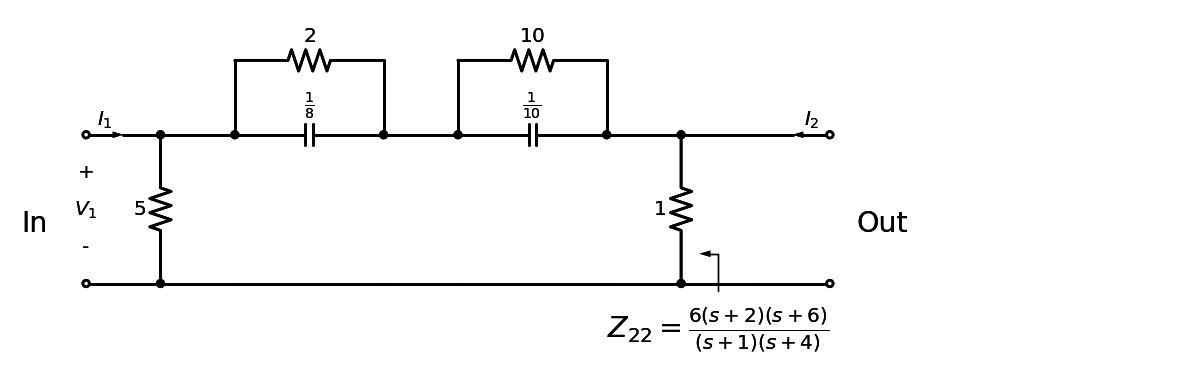

In [40]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Capacitor, Inductor, Resistor

# Resolución simbólica

s = sp.symbols('s ', complex=True)

ZZ = 6*((s+2)*(s+6))/((s+1)*(s+4))

sigma1 = 1
sigma2 = 4
RL = 1

Z2 = sp.factor(sp.simplify(sp.expand(ZZ - RL))) ## para retirar valor especifico de Kinf

Z4, Zt4, R1, C1 = tc2.remover_polo_sigma(Z2, sigma1, isImpedance = True)

Z6, Zt6, R2, C2 = tc2.remover_polo_sigma(Z4, sigma2, isImpedance = True)

Y6 = 1/Z6

R3 = Z6

# Dibujamos la red resultante:
    
d = Drawing(unit=3.5)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                               port_name = 'In', 
                               voltage_lbl = ('+', '$V_1$', '-'), 
                               current_lbl = '$I_1$')

d = tc2.dibujar_elemento_derivacion(d, Resistor, R3)

d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_tanque_RC_serie(d, R2, C2)

d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_tanque_RC_serie(d, R1, C1)

d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_elemento_derivacion(d, Resistor, '1')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z_{22}',  
                                          ZZ, 
                                          hacia_entrada = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_puerto_salida(d, 
                              port_name = 'Out', 
                              current_lbl = '$I_2$' )

display(d)


#### Circuito
<img src="Circuito_ej1.png">

#### Analisis en frecuencia
Al analizar la transferencia de corriente vemos  que tenemos un valor constante para DC. A medida que la la frecuencia aumenta, se hace unitaria
<img src="Circuito_ej1_transferencia.png">

### Ejercicio 2

Verificaremos si los valores y componentes obtenidos son correctos

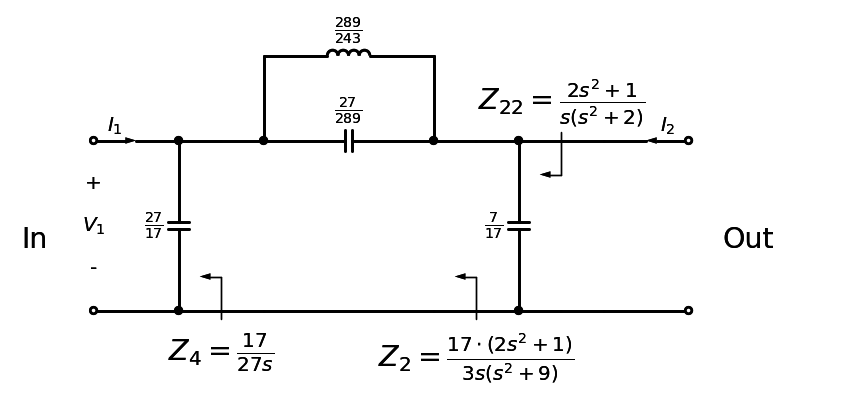

In [37]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor

# 2) Dada la siguiente transferencia de impedancia:

s = sp.symbols('s ', complex=True)

# Zt = V2/I1
Zt = (s**2 + 9)/(s**3 + 2*s**2 + 2*s + 1)

# del esquema se deduce:

# Zt = z21/(1+ z22)
# Sintetizo z22

Z22 = (2*s**2+1)/(s*(s**2+2))


# remoción parcial en infinito de 1/z22
Y2, YC2 = tc2.remover_polo_infinito(1/Z22, omega_zero=3)

C1 = YC2/s

# remoción total en +/-j3
Z4, Zt4, L1, C2 = tc2.remover_polo_jw(1/Y2, omega = 3, isImpedance = True  )

# remoción total en infinito
Y6, YC6 = tc2.remover_polo_infinito(1/Z4)

C3 = YC6/s

# Dibujo de la red sintetizada

d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                               port_name = 'In', 
                               voltage_lbl = ('+', '$V_1$', '-'), 
                               current_lbl = '$I_1$')

d = tc2.dibujar_elemento_derivacion(d, Capacitor, C3)

d, z5_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z_{4}',  
                                          Z4, 
                                          hacia_entrada = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_tanque_serie(d, L1, C2)

d, z3_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z_{2}',  
                                          1/Y2, 
                                          hacia_entrada = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_derivacion(d, Capacitor, C1)

d, z22_lbl = tc2.dibujar_funcion_exc_arriba(d, 
                                            'Z_{22}',  
                                            Z22, 
                                            hacia_entrada  = True, 
                                            k_gap_width = 0.5)

d = tc2.dibujar_puerto_salida(d, 
                              port_name = 'Out', 
                              current_lbl = '$I_2$' )


display(d)
